In [10]:
%load_ext pycodestyle_magic
%pycodestyle_on

Все импортировали, вставили код из прошлой тетрадки

In [11]:
from pymorphy2 import MorphAnalyzer
from string import punctuation
from pprint import pprint
import collections
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns

morph = MorphAnalyzer()

In [12]:
with open('gosudarstvo.txt', encoding='utf-8') as f:
    text = f.read()

In [16]:
words = []
words = word_tokenize(text)
analyzed = []
for word in words:
    razbor = morph.parse(word)[0]
    if razbor.tag.POS:
        analyzed.append({'Слово': razbor.word,
                         'Лемма': razbor.normal_form,
                         'Часть речи': razbor.tag.POS,
                         'Вид': razbor.tag.aspect,
                         'Падеж': razbor.tag.case,
                         'Род': razbor.tag.gender,
                         'Число': razbor.tag.number})

# Задание 1
Созали датафрейм, он создался со столбцами в афлавитном порядке, пришлось танцевать с бубном. Объясните, как правильно

In [20]:
df = pd.DataFrame(analyzed)
new_order = [4, 1, 5, 0, 2, 3, 6]
print(df[df.columns[new_order]])

# Задание 2
Стоблчатая диаграмма для падежей

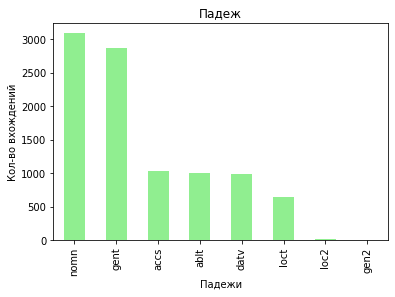

In [21]:
df['Падеж'].value_counts().plot.bar(color='lightgreen')
plt.title('Падеж')
plt.xlabel('Падежи')
plt.ylabel('Кол-во вхождений')
plt.show()

Распределение длинны леммы

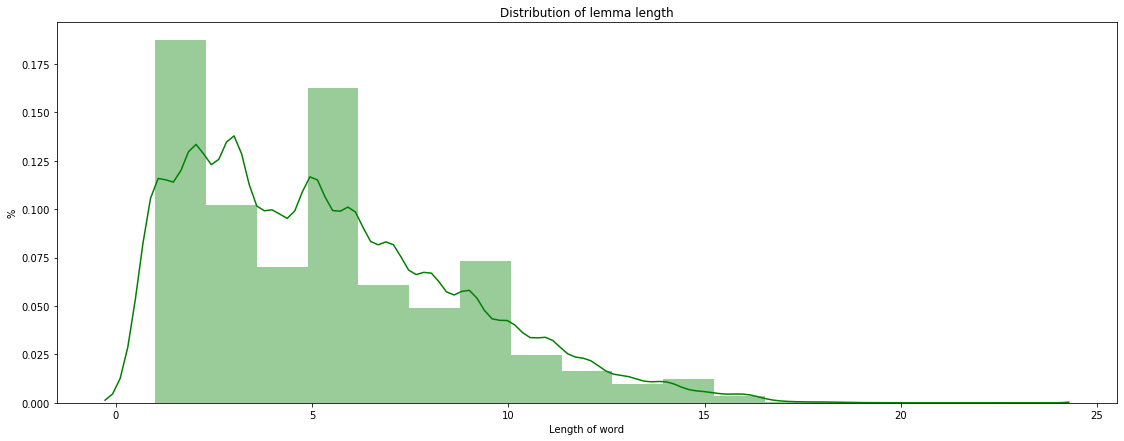

In [23]:
df['length'] = df['Слово'].apply(len)
plt.figure(figsize=(19, 7))
sns.distplot(df['length'], bins=17, color='green')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word')
plt.show()

Круговая диаграмма для рода:

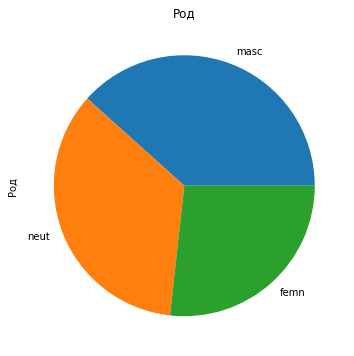

In [24]:
plt.figure(figsize=(6, 6))
df['Род'].value_counts().plot(kind='pie')
plt.title('Род')
plt.show()

# Задание 3
Облако слов без стоп-слов (Что пеп8 не нравится не понимаю...)

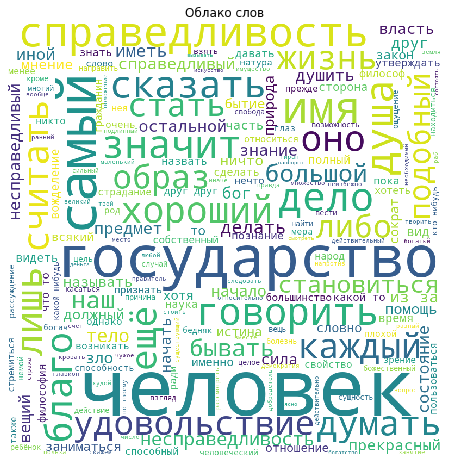

1:41: W291 trailing whitespace
4:59: W291 trailing whitespace
6:19: E251 unexpected spaces around keyword / parameter equals
6:21: E251 unexpected spaces around keyword / parameter equals
6:39: E251 unexpected spaces around keyword / parameter equals
6:41: E251 unexpected spaces around keyword / parameter equals
1:41: W291 trailing whitespace
4:59: W291 trailing whitespace
6:19: E251 unexpected spaces around keyword / parameter equals
6:21: E251 unexpected spaces around keyword / parameter equals
6:39: E251 unexpected spaces around keyword / parameter equals
6:41: E251 unexpected spaces around keyword / parameter equals


In [31]:
stops = set(stopwords.words('russian') + 
            ['это', 'весь', 'который', 'мочь', 'свой'])
text = ' '.join([word for word in df['Лемма'].values if word not in stops])
wordcloud = WordCloud(background_color='white', width=800, 
                      height=800).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

В диаграмме рода мы увидели очень близкие числа, давайте посмотрим на гонку между м, ж и ср. родом:

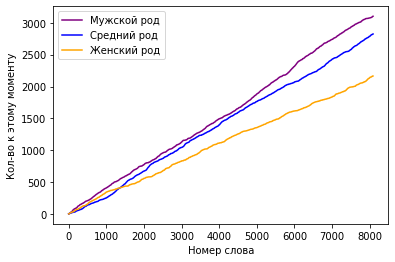

27:60: W291 trailing whitespace
28:62: W291 trailing whitespace
31:23: E261 at least two spaces before inline comment
27:60: W291 trailing whitespace
28:62: W291 trailing whitespace
31:23: E261 at least two spaces before inline comment


In [33]:
m_seq = []
m = 0
n_seq = []
n = 0
f_seq = []
f = 0
for a in df['Род']:
    if a:
        if a == 'masc':
            m = m + 1
            m_seq.append(m)
            n_seq.append(n)
            f_seq.append(f)
        else:
            if a == 'neut':
                n = n + 1
                m_seq.append(m)
                n_seq.append(n)
                f_seq.append(f)
            else:
                f = f + 1
                m_seq.append(m)
                n_seq.append(n)
                f_seq.append(f)
numbers = list(range(8092))
plt.plot(numbers, m_seq, color='purple', label='Мужской род')
plt.plot(numbers, n_seq, color='blue', label='Средний род') 
plt.plot(numbers, f_seq, color='orange', label='Женский род') 
plt.ylabel('Кол-во к этому моменту')
plt.xlabel('Номер слова')
plt.legend(loc='best') # автоматический поиск места для легенды
plt.show()

# Задание 4
Освоение nltk dispersion plot

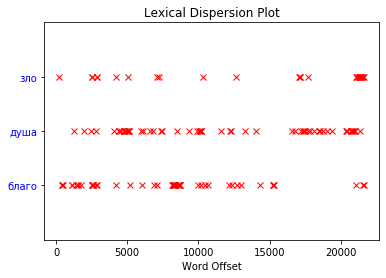

In [34]:
words = ['благо', 'душа', 'зло']
wt_words = df['Лемма'].tolist()
points = [(x, y) for x in range(len(wt_words))
          for y in range(len(words)) if wt_words[x] == words[y]]
if points:
    x, y = zip(*points)
else:
    x = y = ()
plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()

Ну какое-то так себе получилось задание, подключить библиотеку и скопировать код может и макака, при этом я толком так и не разобрался в параметрах и аргументах, которые указываются в скобочках в настройках графика.